In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
df = pd.read_csv("B_to_J_Psi_xsec.csv", delimiter=",", dtype=float)

In [3]:
np.sum(df["xsec(pb)"])

299975.3310874651

In [4]:
df

,Unnamed: 0,ptmin(GeV),ptmax(GeV),y,xsec(pb)
0,0.0,2.0,2.5,5.0,9802.0
1,1.0,2.0,2.5,5.1,8926.0
2,2.0,2.0,2.5,5.2,8079.5
3,3.0,2.0,2.5,5.3,7267.5
4,4.0,2.0,2.5,5.4,6502.0
...,...,...,...,...,...
491,491.0,9.5,10.0,7.6,0.0
492,492.0,9.5,10.0,7.7,0.0
493,493.0,9.5,10.0,7.8,0.0
494,494.0,9.5,10.0,7.9,0.0


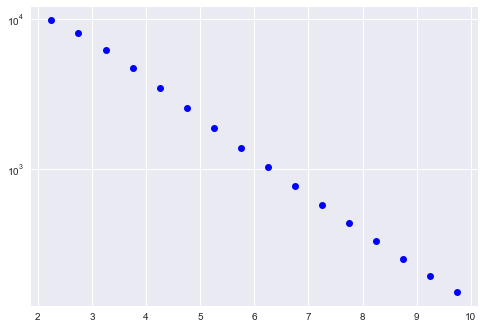

In [5]:
x = 0.5*(df[df["y"]==5]["ptmin(GeV)"] + df[df["y"]==5]["ptmax(GeV)"])
y = df[df["y"]==5]["xsec(pb)"]
plt.plot(x,y, "bo")
plt.yscale("log")

In [6]:
data = []
m = 1.869 # GeV (D0 Mass) 

dy = df.iloc[:,2][1] - df.iloc[:,2][0]

for row in df.values:
    
    pt_min = row[0]
    pt_max = row[1]
    y      = row[2]
    
    y_min  = y - 0.5 * dy
    y_max  = y + 0.5 * dy
    xsec   = row[3]
    
    pz_min     = (pt_min**2 + m**2)**0.5 * np.sinh(y_min)
    pz_max     = (pt_max**2 + m**2)**0.5 * np.sinh(y_max)
    
    p_min      = (pt_min**2 + pz_min**2)**0.5
    theta_min  = np.arctan(pt_min/pz_min)
    feyn_x_min = 2*pz_max/13000
    
    p_max      = (pt_max**2 + pz_max**2)**0.5
    theta_max  = np.arctan(pt_max/pz_max)
    feyn_x_max = 2*pz_max/13000
    
    if feyn_x_min<1 and feyn_x_max<1:
        data.append(np.array([theta_min, theta_max, p_min, p_max, xsec]))

In [7]:
np.savetxt("J_Psi.txt", data, delimiter=",",fmt="%.3e", 
           header="\
FONLL heavy quark hadroproduction cross section\n\
ebeam1 = 6500, ebeam2 = 6500\n\
PDF set = CTEQ6.6\n\
charm to D0 meson\n\
theta_min, theta_max, p_min[GeV], p_max[GeV], xsec[pb]")

In [8]:
df = pd.read_csv("J_Psi.txt", delimiter=",", dtype=float, header=4)

In [9]:
np.sum(df[" xsec[pb]"])

2015.0